In [293]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from random import seed
from random import random
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [294]:
df1 = pd.read_csv('sgemm_product.csv')

In [295]:
#Averaging the 4 run in last 4 column
df1['y']= (df1['Run1 (ms)']+df1['Run2 (ms)']+df1['Run3 (ms)']+df1['Run4 (ms)'])/4
df1.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis = 1,inplace = True)
#df1 = df1.sample(frac = .4, random_state = 2)
df1.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,y
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.571953
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,368.750161
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.317500
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.667500
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.790000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.387500
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3341.507500


In [296]:
#min- max scaling
df = df1.copy(deep = True)
for col in df1.columns[0:14]:
    df[col] = ((df1[col]-df1[col].mean())/df1[col].max()-df1[col].min())

In [297]:
df['y'].mean()

217.571953093958

In [298]:

for i in range(len(df['y'])):
    if(df['y'].values[i] <= 217):
        df['y'].values[i] = 0
    else:
        df['y'].values[i] = 1

In [299]:
train, test = train_test_split(df,train_size=0.7, test_size=0.3, random_state=0)

In [300]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1] 

In [301]:
def logistic_func(X,beta):
    y_hat = 1/(1+ np.exp(-np.dot(X,beta.T)))
    return y_hat
    

In [302]:
def cost_func(y,y_hat,m):
    cost = -1/m*(sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    return(cost)

In [303]:
def gradient_descent(X,y,y_hat,beta,alpha,thresh,max_iter,cut_off):
    num_iter= 1
    m = X.shape[0]
    cost_list=[]
    rmse_list=[]
    for i in range(max_iter):
        cost = cost_func(y,y_hat,m)
        y_hat = logistic_func(X,beta)
        for j in range(X.shape[1]):
            beta[j] = beta[j]-(alpha*(1/m*sum((y_hat-y)*X.transpose()[j])))
        #change_cost = old_cost-cost
        if len(cost_list)>1:
            if (cost< cost_list[-1] ): # if cost increases, we have gone past minimum. SO cut off
                if (cost_list[-1] - cost < thresh):
                    break
            else:    
                break
        cost_list.append(cost)
        rmse_list.append(rmse)
        num_iter += 1
    for i in range(0,len(y_hat)):     # convert predicted probabilities to 0 or 1 based on cut off
        if y_hat[i]>cut_off:
            y_hat[i] = 1
        else:
            y_hat[i] = 0
    correct = np.sum(y == y_hat)
    acc = ((correct/len(y))*100)
    return(cost_list,beta,num_iter,acc)
            
        
    
    

In [304]:
def log_gradient(X,y,alpha,cut_off):
    max_iter = 100
    thresh =  0.000001
    cut_off = cut_off
    #calculate no of feature
    n = X.shape[1]
    #initialize the parameter vector beta
    beta = np.zeros(n+1)
    #concatenate 1 in X
    X_one = np.ones((X.shape[0],1))
    X = np.concatenate((X_one,X),axis = 1)
    #call y_pred function to get y hat
    y_hat = logistic_func(X,beta)
    #call batch gradient descent 
    cost,beta_train_final,it,acc = gradient_descent(X,y,y_hat,beta,alpha,thresh,max_iter,cut_off)
    return(cost,beta,it,acc)

In [305]:
cost,beta_train_final,it,acc = log_gradient(X_train,y_train,alpha =0.001,cut_off = 0.5 )
print(cost)
print(beta)
print(it)
print(acc)

[0.6931471805585493, 0.6931471805585493, 0.6421376888986517, 0.6138477196613371, 0.5978773321088456, 0.5886670068348784, 0.5832477162011674, 0.5800034049530473, 0.5780327868559896, 0.576821154119385, 0.5760683320775143, 0.5755961166906616, 0.5752971410058376, 0.5751059306258156, 0.5749821640344028, 0.574900811771662, 0.5748462370451937, 0.5748086205103006, 0.5747817703716431, 0.5747617692519654, 0.5747461321107145, 0.5747332791507801, 0.5747222043337221, 0.5747122661172316, 0.5747030549439016, 0.5746943091232903, 0.574685861327524, 0.5746776045045591, 0.5746694701342218, 0.5746614143431591, 0.574653409031254, 0.5746454361966141, 0.5746374843044666, 0.5746295459627961, 0.5746216164338126, 0.5746136926806843, 0.574605772756699, 0.574597855413825, 0.5745899398519762, 0.5745820255581541, 0.5745741122034498, 0.5745661995769734, 0.5745582875435098, 0.5745503760163306, 0.5745424649398724, 0.5745345542784271, 0.5745266440091396, 0.5745187341173242, 0.5745108245935944, 0.5745029154318537, 0.574

In [321]:
##accuracy for train set
X_one = np.ones((X_test.shape[0],1))
X = np.concatenate((X_one,X_test),axis = 1)
test_y_hat = logistic_func(X,beta_train_final)
cut_off = 0.5
for i in range(0,len(test_y_hat)):     # convert predicted probabilities to 0 or 1 based on cut off
        if test_y_hat[i]>cut_off:
            test_y_hat[i] = 1
        else:
            test_y_hat[i] = 0
correct = np.sum(y_test == test_y_hat)
acc = ((correct/len(test_y_hat))*100)
print(acc)


74.02041942604856


In [282]:
#experiment 1 # Logistic Regression - for varying values of alpha
expt_logit_train_acc = {}
expt_logit_accuracy_matrix = {}
alpha_logit1 = [0.015, 0.01, 0.005, 0.003, 0.001, 0.0005, 0.0001]
for i in alpha_logit1:
    cost,beta_train_final,it,acc = log_gradient(X_train,y_train,i)
    X_one = np.ones((X_test.shape[0],1))
    X = np.concatenate((X_one,X_test),axis = 1)
    test_y_hat = logistic_func(X,beta_train_final)
    cut_off = 0.5
    for j in range(0,len(test_y_hat)):     # convert predicted probabilities to 0 or 1 based on cut off
        if test_y_hat[j]>cut_off:
            test_y_hat[j] = 1
        else:
            test_y_hat[j] = 0
    correct = np.sum(y_test == test_y_hat)
    acc_test = ((correct/len(test_y_hat))*100)
    expt_logit_train_acc[i] = acc
    expt_logit_accuracy_matrix[i] = acc_test
    
print(expt_logit_train_acc)
print(expt_logit_accuracy_matrix)


{0.015: 73.69855723746453, 0.01: 73.69855723746453, 0.005: 73.69855723746453, 0.003: 73.69855723746453, 0.001: 73.69855723746453, 0.0005: 73.69855723746453, 0.0001: 73.69855723746453}
{0.015: 74.02041942604856, 0.01: 74.02041942604856, 0.005: 74.02041942604856, 0.003: 74.02041942604856, 0.001: 74.02041942604856, 0.0005: 74.02041942604856, 0.0001: 74.02041942604856}


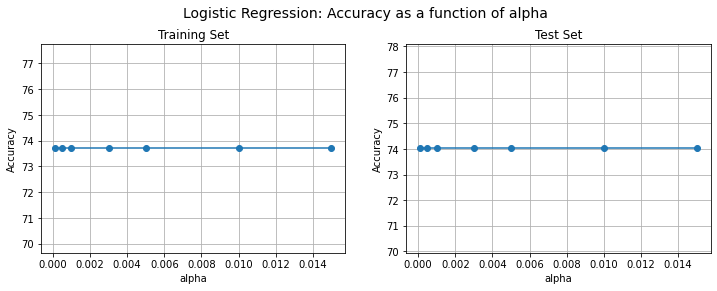

In [291]:
from matplotlib.ticker import FormatStrFormatter
lists_logit1 = sorted(expt_logit_train_acc.items())
x11_l, y11_l = zip(*lists_logit1)
lists_logit2 = sorted(expt_logit_accuracy_matrix.items())
x12_l, y12_l = zip(*lists_logit2)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].plot(x11_l, y11_l, 'o-')
ax[0].set(xlabel='alpha', ylabel='Accuracy',
       title='Training Set')
ax[0].grid()

ax[1].plot(x12_l, y12_l, 'o-')
ax[1].set(xlabel='alpha', ylabel='Accuracy',
       title='Test Set')
ax[1].grid()

fig.suptitle('Logistic Regression: Accuracy as a function of alpha', fontsize=14)
fig.subplots_adjust(top=0.85)
#fig.savefig("expt1_logit.png")
plt.show()

In [309]:
#experiment 2 - with different threshold levels
cutt_off_list = [1,0.8,0.5,0.3,0.1,0.01]


expt_logit_train_acc = {}
expt_logit_accuracy_matrix = {}
cut_off_list = [1,0.8,0.5,0.3,0.1,0.01]
for i in cut_off_list:
    cost,beta_train_final,it,acc = log_gradient(X_train,y_train,0.001,i)
    X_one = np.ones((X_test.shape[0],1))
    X = np.concatenate((X_one,X_test),axis = 1)
    test_y_hat = logistic_func(X,beta_train_final)
    for j in range(0,len(test_y_hat)):     # convert predicted probabilities to 0 or 1 based on cut off
        if test_y_hat[j]>i:
            test_y_hat[j] = 1
        else:
            test_y_hat[j] = 0
    correct = np.sum(y_test == test_y_hat)
    acc_test = ((correct/len(test_y_hat))*100)
    expt_logit_train_acc[i] = acc
    expt_logit_accuracy_matrix[i] = acc_test
    
print(expt_logit_train_acc)
print(expt_logit_accuracy_matrix)

{1: 73.69855723746453, 0.8: 73.69855723746453, 0.5: 73.69855723746453, 0.3: 73.69855723746453, 0.1: 26.301442762535476, 0.01: 26.301442762535476}
{1: 74.02041942604856, 0.8: 74.02041942604856, 0.5: 74.02041942604856, 0.3: 74.02041942604856, 0.1: 25.979580573951434, 0.01: 25.979580573951434}


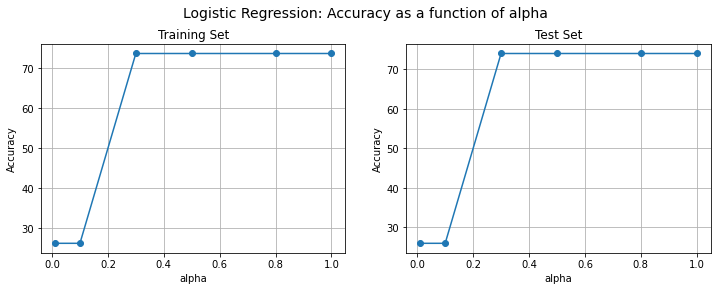

In [310]:
from matplotlib.ticker import FormatStrFormatter
lists_logit1 = sorted(expt_logit_train_acc.items())
x11_l, y11_l = zip(*lists_logit1)
lists_logit2 = sorted(expt_logit_accuracy_matrix.items())
x12_l, y12_l = zip(*lists_logit2)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].plot(x11_l, y11_l, 'o-')
ax[0].set(xlabel='alpha', ylabel='Accuracy',
       title='Training Set')
ax[0].grid()

ax[1].plot(x12_l, y12_l, 'o-')
ax[1].set(xlabel='alpha', ylabel='Accuracy',
       title='Test Set')
ax[1].grid()

fig.suptitle('Logistic Regression: Accuracy as a function of alpha', fontsize=14)
fig.subplots_adjust(top=0.85)
#fig.savefig("expt1_logit.png")
plt.show()

In [322]:
## Experiment 3 selecting 8 random features
df.head(4)
df2 = df.iloc[:,:-1]
df2.head(4)
df2  =df2.sample(8, axis=1,random_state = 0)
df2.head()
df2 = pd.concat([df2, df['y']], axis=1)

In [323]:
train2, test2 = train_test_split(df2,train_size=0.7, test_size=0.3, random_state=0)
X_train_2 = train2.iloc[:,:-1]
y_train_2 = train2.iloc[:,-1]
X_test_2 = test2.iloc[:,:-1]
y_test_2 = test2.iloc[:,-1] 

In [324]:
cost_train_1,beta_train_final_1,it_1,acc_1 = log_gradient(X_train,y_train,alpha =0.001,cut_off = 0.5 )
cost_train_2,beta_train_final_2,it_2,acc_2 = log_gradient(X_train_2,y_train_2,alpha =0.001,cut_off = 0.5 )
cost_train_1_val = cost_train_1[-1]
cost_train_2_val = cost_train_2[-1]

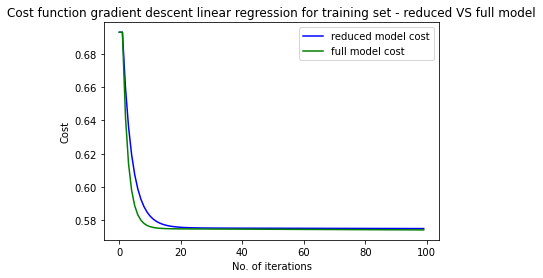

In [325]:
# plot Cost function
plt.title("Cost function gradient descent linear regression for training set - reduced VS full model")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.plot(cost_train_2,'b', label = 'reduced model cost')
plt.plot(cost_train_1,'g', label = 'full model cost')
plt.legend()
plt.show()

In [326]:
#calculating the accuracy for reduced feature
##accuracy for train set
X_one = np.ones((X_test_2.shape[0],1))
X = np.concatenate((X_one,X_test_2),axis = 1)
test_y_hat = logistic_func(X,beta_train_final_2)
cut_off = 0.5
for i in range(0,len(test_y_hat)):     # convert predicted probabilities to 0 or 1 based on cut off
        if test_y_hat[i]>cut_off:
            test_y_hat[i] = 1
        else:
            test_y_hat[i] = 0
correct = np.sum(y_test_2 == test_y_hat)
acc_3 = ((correct/len(test_y_hat))*100)
print(acc_3)

74.02041942604856


(0.0, 1.0, 0.0, 1.0)

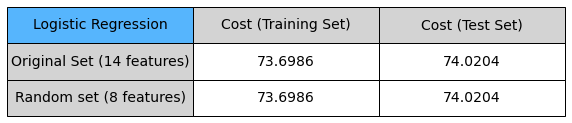

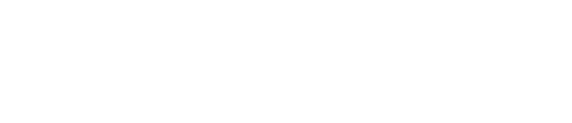

In [327]:
fig3 = plt.figure(figsize=(10, 2))
ax3 = plt.subplot(111)
ax3.axis('off')

colLabels3 = ['Logistic Regression','Cost (Training Set)', 'Cost (Test Set)']
cellText3 = [['Original Set (14 features)',round(acc_1,4), round(acc,4)],
            ['Random set (8 features)',round(acc_2,4), round(acc_3,4)]]
colColours3 = ['#56b5fd','lightgray','lightgray']
rowColours3 = [['lightgray','w','w'],['lightgray','w','w']]
tab3 = ax3.table(cellText=cellText3, colLabels=colLabels3, bbox=[0, 0, 1, 1], cellLoc = 'center', cellColours=rowColours3, colColours=colColours3)
tab3.auto_set_font_size(False)
tab3.set_fontsize(14)

fig33 = plt.figure(figsize=(10, 2))
ax33 = plt.subplot(111)
ax33.axis('off')

In [337]:
#Experiment 4 
df.head(4)
df_corr = df.iloc[:,:-1]
df_corr = df_corr.drop(df_corr[['VWM','VWN','NWG','MDIMC','KWG','NDIMC']], axis=1)
#df_corr.head(4)
df_corr = pd.concat([df_corr, df['y']], axis=1)
df_corr.head(4)

,MWG,MDIMA,NDIMB,KWI,STRM,STRN,SA,SB,y
0,-16.503245,-8.292848,-8.292848,-2.375,-0.5,-0.5,-0.5,-0.5,0.0
1,-16.503245,-8.292848,-8.292848,-2.375,-0.5,-0.5,-0.5,0.5,0.0
2,-16.503245,-8.292848,-8.292848,-2.375,-0.5,-0.5,0.5,-0.5,0.0
3,-16.503245,-8.292848,-8.292848,-2.375,-0.5,-0.5,0.5,0.5,0.0


In [338]:
train3, test3 = train_test_split(df_corr,train_size=0.7, test_size=0.3, random_state=0)
X_train_3 = train3.iloc[:,:-1]
y_train_3 = train3.iloc[:,-1]
X_test_3 = test3.iloc[:,:-1]
y_test_3 = test3.iloc[:,-1] 

In [339]:
cost_train_3,beta_train_final_3,it_3,acc_4 = log_gradient(X_train_3,y_train_3,alpha =0.001,cut_off = 0.5 )


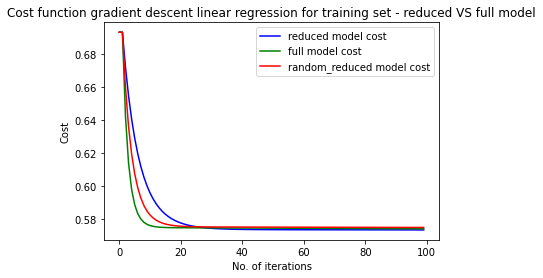

In [340]:
# plot Cost function
plt.title("Cost function gradient descent linear regression for training set - reduced VS full model")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.plot(cost_train_3,'b', label = 'reduced model cost')
plt.plot(cost_train_1,'g', label = 'full model cost')
plt.plot(cost_train_2,'r', label = 'random_reduced model cost')
plt.legend()
plt.show()



In [341]:
#calculating the accuracy for reduced feature
##accuracy for train set
X_one = np.ones((X_test_3.shape[0],1))
X = np.concatenate((X_one,X_test_3),axis = 1)
test_y_hat = logistic_func(X,beta_train_final_3)
cut_off = 0.5
for i in range(0,len(test_y_hat)):     # convert predicted probabilities to 0 or 1 based on cut off
        if test_y_hat[i]>cut_off:
            test_y_hat[i] = 1
        else:
            test_y_hat[i] = 0
correct = np.sum(y_test_2 == test_y_hat)
acc_5 = ((correct/len(test_y_hat))*100)
print(acc_5)

74.02041942604856


(0.0, 1.0, 0.0, 1.0)

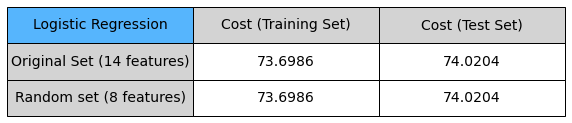

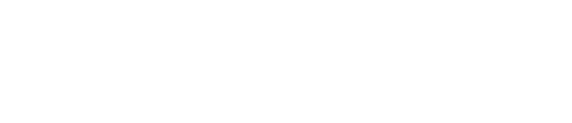

In [343]:
fig3 = plt.figure(figsize=(10, 2))
ax3 = plt.subplot(111)
ax3.axis('off')

colLabels3 = ['Logistic Regression','Cost (Training Set)', 'Cost (Test Set)']
cellText3 = [['Original Set (14 features)',round(acc_1,4), round(acc,4)],
            ['Random set (8 features)',round(acc_4,4), round(acc_5,4)]]
colColours3 = ['#56b5fd','lightgray','lightgray']
rowColours3 = [['lightgray','w','w'],['lightgray','w','w']]
tab3 = ax3.table(cellText=cellText3, colLabels=colLabels3, bbox=[0, 0, 1, 1], cellLoc = 'center', cellColours=rowColours3, colColours=colColours3)
tab3.auto_set_font_size(False)
tab3.set_fontsize(14)

fig33 = plt.figure(figsize=(10, 2))
ax33 = plt.subplot(111)
ax33.axis('off')